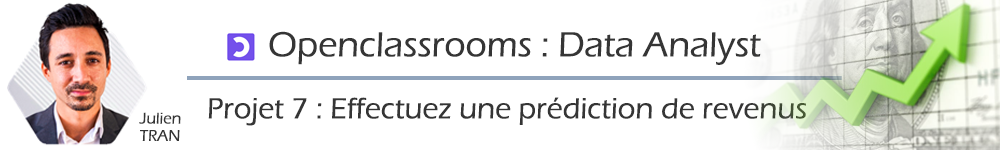

### Mission 4:

Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. <font color='royalblue'> Quel est le pourcentage de variance expliquée par votre modèle ? </font>

Selon ce modèle, donnez la décomposition de variance totale expliquée par :

Le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;  
Les autres facteurs non considérés dans le modèle (efforts, chance, etc.). 

Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. <font color='royalblue'> Quel est le pourcentage de variance expliquée par ce nouveau modèle ? </font>

En observant le coefficient de régression associé à l’indice de Gini, <font color='royalblue'> peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ? </font>

Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :

Le pays de naissance et le revenu des parents  
Les autres facteurs non considérés dans le modèle (efforts, chance, etc.)

### Sommaire // Mission 4 🔮

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.ANOVA de la variable revenus des enfants en fonction du pays](#3)
    * [3.1.Préparation des données](#3.1)
    * [3.2.Regression lineaire 1_v1](#3.2)
    * [3.3.Regression lineaire 1_v2](#3.3)
        * [3.3.1.Amelioration du modele](#3.3.1)
    * [3.4.Regression lineaire 2_v1](#3.4)
    * [3.5.Regression lineaire 2_v2](#3.5)
    * [3.6.Regression lineaire 3_v1](#3.6)
    * [3.7.Regression lineaire 3_v2](#3.7)
* [4.Aller plus loin](#4)
    * [4.1.Calculez les leviers > individus atypiques](#4.1)
    * [4.2.Calculez les résidus studentisés](#4.2)
    * [4.3.Déterminez la distance de Cook > individus influents](#4.3)
    * [4.4.Vérifier la colinéarité des variables](#4.4)
    * [4.5.Testez l’homoscédasticité](#4.5)
    * [4.6.Testez la normalité des résidus](#4.6)
* [5.Prédiction d'un revenu](#5)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy as sp
from scipy import stats

import statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t, shapiro

#Je definis le nombre de lignes max affichées sur None
pd.set_option("max_rows", None) 
pd.set_option("display.precision",2)
pd.options.display.float_format = '{:.2f}'.format

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
data_projet7_m4 = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/data_projet7_m4.csv",decimal=".")
data_projet7_clean = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/data_projet7_clean.csv",decimal=".")
Indice_gini = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/Indice_gini.csv",decimal=".")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


## 3.ANOVA de la variable revenus des enfants en fonction du pays <a class="anchor" id="3"></a>

In [3]:
data_projet7_m4.head()

,Country,ISO3,y_child,G_j,p_j,c_i_parent,m_j,income_log,m_j_log
0,Albania,ALB,728,29.98,0.48,1,2994.83,6.59,8.00
1,Albania,ALB,916,29.98,0.48,1,2994.83,6.82,8.00
2,Albania,ALB,1010,29.98,0.48,1,2994.83,6.92,8.00
3,Albania,ALB,1086,29.98,0.48,1,2994.83,6.99,8.00
4,Albania,ALB,1132,29.98,0.48,1,2994.83,7.03,8.00


In [4]:
data_projet7_m4['c_i_parent'].dtypes

dtype('int64')

## 3.1.Prépatation des données <a class="anchor" id="3.1"></a>

In [5]:
# Pour l'ensemble des tests, notre niveau de test sera:
alpha = 0.05

### <font color='royalblue'> *Le pays d'origine a-t-il une influence sur le revenu?* </font>

H0: Tous les pays ont le même revenu (tous les alpha_i sont nuls)  
Le pays n'a pas d'influence sur le revenu enfant moyen  

H1: Les revenus dépendent du pays (les alpha_i sont différents de 0)  
Le pays a une influence sur le revenu

In [6]:
# Agrégation pour gagner en temps de calcul
data_projet7_m4_2 = data_projet7_m4.groupby(by=['Country',
                                  'ISO3',
                                  'y_child',
                                  'm_j',
                                  'G_j',
                                  'p_j',
                                  'm_j_log',
                                  'income_log']).mean()
data_projet7_m4_2.reset_index(inplace=True)
#data_projet7_m4_2.drop(columns=['c_i_parent'], inplace=True) # variable non necessaire pour la suite

data_projet7_m4_2.c_i_parent = data_projet7_m4_2.c_i_parent.round()

data_projet7_m4_2.head(2)

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent
0,Albania,ALB,728,2994.83,29.98,0.48,8.00,6.59,41.00
1,Albania,ALB,916,2994.83,29.98,0.48,8.00,6.82,41.00


In [7]:
data_projet7_m4.shape, data_projet7_m4_2.shape

((5200000, 9), (10400, 9))

In [8]:
# Restriction des pays selectionnés precedemment
data_projet7_m4_3 = data_projet7_m4_2.loc[(data_projet7_m4_2['Country'] == 'France') | (data_projet7_m4_2['Country'] == 'Greece') |
                          (data_projet7_m4_2['Country'] == 'Thailand') | (data_projet7_m4_2['Country'] == 'Czech Republic') |
                          (data_projet7_m4_2['Country'] == 'Costa Rica') | (data_projet7_m4_2['Country'] == 'Armenia') | 
                          (data_projet7_m4_2['Country'] == 'Iceland') | (data_projet7_m4_2['Country'] == 'Ukraine')]

data_projet7_m4_3.head()

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent
100,Armenia,ARM,366,1628.38,29.20,0.42,7.40,5.90,41.00
101,Armenia,ARM,535,1628.38,29.20,0.42,7.40,6.28,41.00
102,Armenia,ARM,611,1628.38,29.20,0.42,7.40,6.42,41.00
103,Armenia,ARM,658,1628.38,29.20,0.42,7.40,6.49,42.00
104,Armenia,ARM,690,1628.38,29.20,0.42,7.40,6.54,42.00


In [9]:
means_y_child = data_projet7_m4_3.groupby('Country')['y_child'].mean()
means_y_child

Country
Armenia           1627.88
Costa Rica        5579.90
Czech Republic    8234.77
France           18308.90
Greece           11726.79
Iceland          26888.03
Thailand          2743.21
Ukraine           3348.90
Name: y_child, dtype: float64

Text(0.5, 1.0, 'Revenu des enfants par Pays')

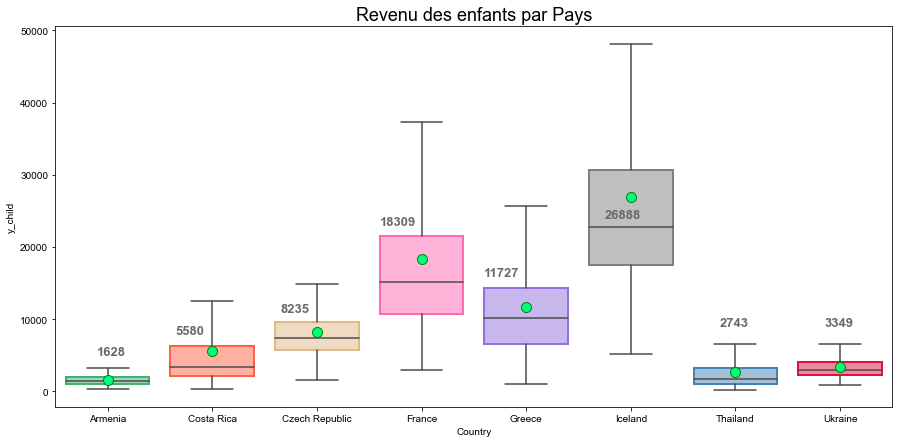

In [10]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x='Country', y='y_child',data=data_projet7_m4_3,showfliers = False,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})

mybox = ax.artists[0]
mybox.set_facecolor('mediumseagreen'), mybox.set_edgecolor('mediumseagreen'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('tomato'), mybox.set_edgecolor('tomato'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('burlywood'), mybox.set_edgecolor('burlywood'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('hotpink'), mybox.set_edgecolor('hotpink'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('mediumpurple'), mybox.set_edgecolor('mediumpurple'), mybox.set_linewidth(2)

mybox = ax.artists[5]
mybox.set_facecolor('grey'), mybox.set_edgecolor('grey'), mybox.set_linewidth(2)

mybox = ax.artists[6]
mybox.set_facecolor('steelblue'), mybox.set_edgecolor('steelblue'), mybox.set_linewidth(2)

mybox = ax.artists[7]
mybox.set_facecolor('crimson'), mybox.set_edgecolor('crimson'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.1, 5000, '1628', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.65, 8000, '5580', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.65, 11000, '8235', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.60, 23000, '18309', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.60, 16000, '11727', fontsize=13, color='dimgrey',weight='bold')
plt.text(4.75, 24000, '26888', fontsize=13, color='dimgrey',weight='bold')
plt.text(5.85, 9000, '2743', fontsize=13, color='dimgrey',weight='bold')
plt.text(6.85, 9000, '3349', fontsize=13, color='dimgrey',weight='bold')
    
plt.title("Revenu des enfants par Pays", size=18)

In [11]:
means_income_log = data_projet7_m4_3.groupby('Country')['income_log'].mean()
means_income_log

Country
Armenia           7.28
Costa Rica        8.20
Czech Republic    8.91
France            9.63
Greece            9.18
Iceland          10.06
Thailand          7.51
Ukraine           8.01
Name: income_log, dtype: float64

### <font color='red'> On voit ici que les revenus sont très différents d'un pays à l'autre. Par exemple, les revenus pour l'islande sont plus élevés et plus dispersés que ceux autres pays. </font>

Text(0.5, 1.0, 'Revenu des enfants par Pays')

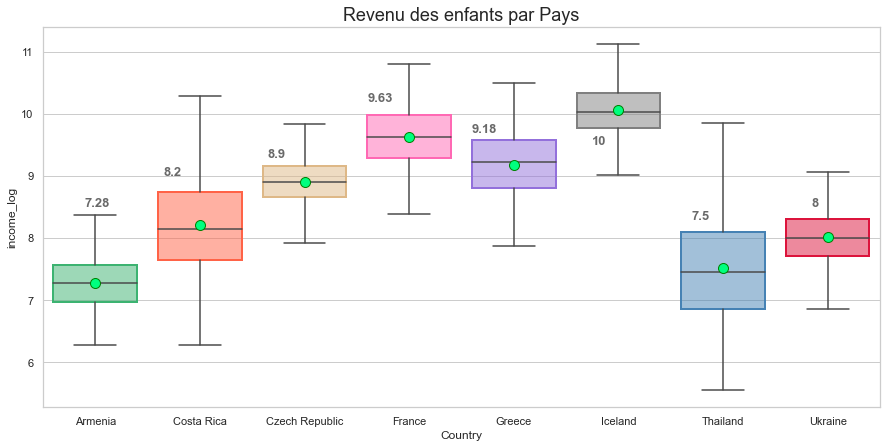

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x='Country', y='income_log',data=data_projet7_m4_3,showfliers = False,showmeans=True,flierprops = dict(marker='o',markerfacecolor = 'dimgrey', markersize = 6), width=0.8,meanprops={"marker": "o","markerfacecolor" :"springgreen","markeredgecolor": "green","markersize": "10"})

mybox = ax.artists[0]
mybox.set_facecolor('mediumseagreen'), mybox.set_edgecolor('mediumseagreen'), mybox.set_linewidth(2)

mybox = ax.artists[1]
mybox.set_facecolor('tomato'), mybox.set_edgecolor('tomato'), mybox.set_linewidth(2)

mybox = ax.artists[2]
mybox.set_facecolor('burlywood'), mybox.set_edgecolor('burlywood'), mybox.set_linewidth(2)

mybox = ax.artists[3]
mybox.set_facecolor('hotpink'), mybox.set_edgecolor('hotpink'), mybox.set_linewidth(2)

mybox = ax.artists[4]
mybox.set_facecolor('mediumpurple'), mybox.set_edgecolor('mediumpurple'), mybox.set_linewidth(2)

mybox = ax.artists[5]
mybox.set_facecolor('grey'), mybox.set_edgecolor('grey'), mybox.set_linewidth(2)

mybox = ax.artists[6]
mybox.set_facecolor('steelblue'), mybox.set_edgecolor('steelblue'), mybox.set_linewidth(2)

mybox = ax.artists[7]
mybox.set_facecolor('crimson'), mybox.set_edgecolor('crimson'), mybox.set_linewidth(2)

# ajout de la transparence des couleurs
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.text(-0.1, 8.5, '7.28', fontsize=13, color='dimgrey',weight='bold')
plt.text(0.65, 9, '8.2', fontsize=13, color='dimgrey',weight='bold')
plt.text(1.65, 9.3, '8.9', fontsize=13, color='dimgrey',weight='bold')
plt.text(2.60, 10.2, '9.63', fontsize=13, color='dimgrey',weight='bold')
plt.text(3.60, 9.7, '9.18', fontsize=13, color='dimgrey',weight='bold')
plt.text(4.75, 9.5, '10', fontsize=13, color='dimgrey',weight='bold')
plt.text(5.7, 8.3, '7.5', fontsize=13, color='dimgrey',weight='bold')
plt.text(6.85, 8.5, '8', fontsize=13, color='dimgrey',weight='bold')
    
plt.title("Revenu des enfants par Pays", size=18)

### <font color='red'> En passant l'income à une échelle logarithmique, les variances semblent déjà être plus égalitaires. Ce modèle sera donc probablement meilleur. Je vais verifier cela avec une regression linéaire. </font>

## 3.2.Regression lineaire 1_v1 <a class="anchor" id="3.2"></a>

In [13]:
Regression_lineaire_1_v1 = smf.ols('y_child ~ Country', data=data_projet7_m4_2).fit(alpha=alpha)

print(Regression_lineaire_1_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     96.93
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:38   Log-Likelihood:            -1.0647e+05
No. Observations:               10400   AIC:                         2.131e+05
Df Residuals:                   10296   BIC:                         2.139e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### <font color='red'> La variable pays explique près de 50% de la variance du revenu (R² = 0,492) </font>
#### *Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu*

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour Country) est nulle donc inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu.

Le pays d'un individu a donc bien une influence sur ses revenus.

In [14]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_1_v1 = sm.stats.anova_lm(Regression_lineaire_1_v1, typ=2)

#(Somme des Carrés Expliquée) traduit la variation expliquée par le modèle.
SCE_Country = fish_1_v1.iloc[0,0] #variation interclasse
#(Somme des Carrés Résiduelle) traduit la variation inexpliquée par le modèle.
SCR_Country = fish_1_v1.iloc[1,0] #variation intraclasse
#(Somme des Carrés Totale) 
SCT_Country = SCE_Country + SCR_Country

Country = SCE_Country/(SCT_Country)
fish_1_v1

,sum_sq,df,F,PR(>F)
Country,460216236085.19,103.00,96.93,0.00
Residual,474599487812.75,10296.00,NaN,NaN


In [15]:
print("La variance expliquée de la variable Country est de :",Country*100,'%')

La variance expliquée de la variable Country est de : 49.23069053291142 %


## 3.3.Regression lineaire 1_v2 <a class="anchor" id="3.3"></a>

In [16]:
Regression_lineaire_1_v2 = smf.ols('income_log ~ ISO3', data=data_projet7_m4_2).fit()

print(Regression_lineaire_1_v2.summary())

                            OLS Regression Results                            
Dep. Variable:             income_log   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     285.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:39   Log-Likelihood:                -11085.
No. Observations:               10400   AIC:                         2.238e+04
Df Residuals:                   10296   BIC:                         2.313e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.8517      0.071    111.203      

In [17]:
# Extraction des Pvalues
pvalues_1v2 = Regression_lineaire_1_v2.summary2().tables[1][1:]['P>|t|']

### <font color='red'> La variable pays explique près de 75% de la variance du revenu (R² = 0,741) </font>
#### *Les autres facteurs non considérés dans le modèle expliquent l'autre partie de la variance du revenu*

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour Country) est nulle donc inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu.

Le pays d'un individu a donc bien une influence sur ses revenus.

In [18]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_1_v2 = sm.stats.anova_lm(Regression_lineaire_1_v2, typ=2)

#(Somme des Carrés Expliquée) traduit la variation expliquée par le modèle.
SCE_Country = fish_1_v2.iloc[0,0] #variation interclasse
#(Somme des Carrés Résiduelle) traduit la variation inexpliquée par le modèle.
SCR_Country = fish_1_v2.iloc[1,0] #variation intraclasse
#(Somme des Carrés Totale) 
SCT_Country = SCE_Country + SCR_Country

Country = SCE_Country/(SCT_Country)
fish_1_v2

,sum_sq,df,F,PR(>F)
ISO3,14676.47,103.00,285.82,0.00
Residual,5132.89,10296.00,NaN,NaN


In [19]:
print("La variance expliquée de la variable Country est de :",Country*100,'%')

La variance expliquée de la variable Country est de : 74.08856130983182 %


### <font color='red'>Je peux donc affirmer que la variable Country, le pays d'origine d'un individu, à bien une forte influence sur le revenu d'un enfant. </font>

## 3.3.1.Amélioration du modele 1_v2 <a class="anchor" id="3.3.1"></a>

In [20]:
# Rappel, pour l'ensemble des tests, notre niveau de test est:
alpha = 0.05

# Liste des pays supprimés
pays_suppr=[]

### <font color='royalblue'> Elimination des pays en methode backward  :    
- <font color='royalblue'> étape 1 : fixer seuil : alpha = 0.05</font>
- <font color='royalblue'>étape 2 : Tous les pays inclus pour commencer</font>
- <font color='royalblue'>étape 3 : J'enleve le pays où pvalue > seuil est la plus forte</font>  
- <font color='royalblue'>étape 4 : Itération tant que la condition de l'étape 3 est vraie </font>

In [21]:
%%time

# Tant que le nombre de pvalues > 0,05 est différent de 0 la boucle tourne
while len(pvalues_1v2[pvalues_1v2 > alpha])!=0 :
    
    # selection du pays avec la plus haute pvalue
    indice_pvalue_max = pvalues_1v2.argmax()
    country_name = pvalues_1v2.index[indice_pvalue_max][7:10]

    # suppression du pays
    pays_suppr.append(country_name)
    data_projet7_m4_2 = data_projet7_m4_2[data_projet7_m4_2['ISO3']!=country_name]
    
    # Ajustement de la regression linéraire sans le pays supprimé
    Regression_lineaire_1_v2 = smf.ols('income_log ~ ISO3', data=data_projet7_m4_2).fit()
    
    # Acquisition des pvalues dans statsmodel summary2()
    pvalues_1v2 = Regression_lineaire_1_v2.summary2().tables[1][1:]['P>|t|']
    
    # pvalue = pvalues > 0.05 dans la liste pvalue
    pvalues_1v2 = pvalues_1v2[pvalues_1v2 > alpha]
    
    # pvalue = pvalues qui n'ont pas un index dont les 4e lettres compris dans la liste pays_suppr
    pvalues_1v2 = pvalues_1v2[~pvalues_1v2.index.str[7:10].isin([pays_suppr])]

print(pays_suppr)

['ROU', 'JOR', 'MEX', 'BRA', 'ZAF', 'PER', 'UKR', 'PAN']
Wall time: 3.97 s


In [22]:
# Review de la derniere regression de la boucle
print(Regression_lineaire_1_v2.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:             income_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     328.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:43   Log-Likelihood:                -9942.4
No. Observations:                9600   AIC:                         2.008e+04
Df Residuals:                    9504   BIC:                         2.077e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         


In [23]:
data_projet7_m4_2['Country'].unique()

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "C�te d'Ivoire", 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Fiji',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran Islamic Republic of', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kenya', 'Korea Republic of', 'Kyrgyzstan',
       'Lao PDR', 'Latvia', 'Liberia', 'Lithuania',
       'Macedonia Republic of', 'Madagascar', 'Malawi', 'Malaysia',
       'Mali', 'Mauritania', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'Niger',
       'Nigeria', 'Norway', 'Pakistan', 'Palest

### <font color='red'> La variable pays explique près de 77% de la variance du revenu (R² = 0,767) </font>
### <font color='red'> Je constate une legere amélioration du R² avec les pays non significatifs supprimés du jeu de données </font>

## 3.4.Regression lineaire 2_v1 <a class="anchor" id="3.4"></a>

In [24]:
Regression_lineaire_2_v1 = smf.ols('y_child ~ m_j + G_j', data=data_projet7_m4_2).fit(alpha=alpha)

print(Regression_lineaire_2_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     4889.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:43   Log-Likelihood:                -98373.
No. Observations:                9600   AIC:                         1.968e+05
Df Residuals:                    9597   BIC:                         1.968e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5402    390.608     -0.001      0.9

### <font color='red'> La variable pays explique 50% de la variance du revenu (R² = 0,505) </font>
#### *Les autres facteurs non considérés dans le modèle expliquent l'autre moitié de la variance du revenu*

### <font color='red'> Je constate que la pvalue de l'indice de Gini est au dessus du seuil, pour ce modele l'indice de Gini est donc une variable non significative </font>

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour m_j) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu.

Le pays d'un individu a donc bien une influence sur ses revenus mais pas son indice de Gini.

In [25]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_2_v1 = sm.stats.anova_lm(Regression_lineaire_2_v1, typ=2)
SCE_m_j = fish_2_v1.iloc[0,0] #variation interclasse
SCR_m_j = fish_2_v1.iloc[2,0] #variation intraclasse
SCE_G_j = fish_2_v1.iloc[1,0]
SCR_G_j = fish_2_v1.iloc[2,0]
m_j = SCE_m_j/(SCR_m_j+SCE_m_j)
G_j = SCE_G_j/(SCR_G_j+SCE_G_j)
fish_2_v1

,sum_sq,df,F,PR(>F)
m_j,375600509146.69,1.00,8062.19,0.00
G_j,0.48,1.00,0.00,1.00
Residual,447104360259.78,9597.00,NaN,NaN


In [26]:
print("La variance expliquée du revenu moyen  est de :",m_j*100,'%')
print("La variance expliquée de l'indice de gini  est de :",G_j*100,'%')

La variance expliquée du revenu moyen  est de : 45.65434375241526 %
La variance expliquée de l'indice de gini  est de : 1.0634908602216462e-10 %


## 3.5.Regression lineaire 2_v2 <a class="anchor" id="3.5"></a>

In [27]:
Regression_lineaire_2_v2 = smf.ols('income_log ~ m_j_log + G_j', data=data_projet7_m4_2).fit(alpha=alpha)

print(Regression_lineaire_2_v2.summary())

                            OLS Regression Results                            
Dep. Variable:             income_log   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.558e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:                -9987.5
No. Observations:                9600   AIC:                         1.998e+04
Df Residuals:                    9597   BIC:                         2.000e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3286      0.075      4.358      0.0

### <font color='red'> La variable pays explique près de 77% de la variance du revenu (R² = 0,765)</font>
### <font color='red'> Les autres facteurs non considérés dans le modèle expliquent l'autre partie de la variance du revenu </font>

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour m_j_log et G_j) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu.

Le pays et l'indice de gini d'un individu a donc bien une influence sur ses revenus.

In [28]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_2_v2 = sm.stats.anova_lm(Regression_lineaire_2_v2, typ=2)
SCE_m_j = fish_2_v2.iloc[0,0] #variation interclasse
SCR_m_j = fish_2_v2.iloc[2,0] #variation intraclasse
SCE_G_j = fish_2_v2.iloc[1,0]
SCR_G_j = fish_2_v2.iloc[2,0]
m_j_log = SCE_m_j/(SCR_m_j+SCE_m_j)
G_j = SCE_G_j/(SCR_G_j+SCE_G_j)
fish_2_v2

,sum_sq,df,F,PR(>F)
m_j_log,10915.10,1.00,23265.66,0.00
G_j,82.24,1.00,175.30,0.00
Residual,4502.44,9597.00,NaN,NaN


In [29]:
print("La variance expliquée du revenu moyen (log)  est de :",m_j*100,'%')
print("La variance expliquée de l'indice de gini  est de :",G_j*100,'%')

La variance expliquée du revenu moyen (log)  est de : 45.65434375241526 %
La variance expliquée de l'indice de gini  est de : 1.7938053619661065 %


## 3.6.Regression lineaire 3_v1 <a class="anchor" id="3.6"></a>

In [30]:
Regression_lineaire_3_v1 = smf.ols('y_child ~ m_j + G_j + c_i_parent', data=data_projet7_m4_2).fit(alpha=alpha)

print(Regression_lineaire_3_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_child   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     5919.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:                -96718.
No. Observations:                9600   AIC:                         1.934e+05
Df Residuals:                    9596   BIC:                         1.935e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.402e+04    633.131    -53.728      0.0

### <font color='red'> Les variable pays et classe des parents expliquent près de 65% de la variance du revenu (R² = 0,649)</font>
### <font color='red'> Les autres facteurs non considérés dans le modèle expliquent l'autre partie de la variance du revenu </font>

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour m_j_log et c_i_parent) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu.

Le pays  et la classe de revenu des parents d'un individu a donc bien une influence sur ses revenus, mais pas son indice de gini.

In [31]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_3_v1 = sm.stats.anova_lm(Regression_lineaire_3_v1, typ=2)
SCE_m_j = fish_3_v1.iloc[0,0] #variation interclasse
SCR_m_j = fish_3_v1.iloc[3,0] #variation intraclasse
SCE_G_j = fish_3_v1.iloc[1,0]
SCR_G_j = fish_3_v1.iloc[3,0]
SCE_class = fish_3_v1.iloc[2,0]
SCR_class = fish_3_v1.iloc[3,0]

m_j = SCE_m_j/(SCR_m_j+SCE_m_j)
G_j = SCE_G_j/(SCR_G_j+SCE_G_j)
classe_parent = SCE_class/(SCE_class+SCR_class)

fish_3_v1

,sum_sq,df,F,PR(>F)
m_j,375979007163.60,1.00,11392.89,0.00
G_j,312010.96,1.00,0.01,0.92
c_i_parent,130424879661.98,1.00,3952.13,0.00
Residual,316679480597.80,9596.00,NaN,NaN


In [32]:
print('La variance expliquée des revenus moyen est de :',m_j*100,'%')
print("La variance expliquée d'indice de gini est de :",G_j*100,'%')
print('La variance expliquée de la classe parent  est de :',classe_parent*100,'%')

La variance expliquée des revenus moyen est de : 54.28057459870699 %
La variance expliquée d'indice de gini est de : 9.852569342364325e-05 %
La variance expliquée de la classe parent  est de : 29.171014925061918 %


## 3.7.Regression lineaire 3_v2 <a class="anchor" id="3.7"></a>

In [33]:
Regression_lineaire_3_v2 = smf.ols('income_log ~ m_j_log + G_j + c_i_parent', data=data_projet7_m4_2).fit(alpha=alpha)

print(Regression_lineaire_3_v2.summary())

                            OLS Regression Results                            
Dep. Variable:             income_log   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 9.065e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:10:44   Log-Likelihood:                -711.49
No. Observations:                9600   AIC:                             1431.
Df Residuals:                    9596   BIC:                             1460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5137      0.038   -146.055      0.0

### <font color='red'> Les variable pays et classe des parents expliquent près de 100% de la variance du revenu (R² = 0,966) </font>

### Test de fisher

calcule si des données observées sont significativement éloignées de l'indépendance (p-valeur)

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (0 pour m_j_log, G_j et c_i_parent) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle tous les pays ont le même revenu (tous les alpha_i sont nuls)

Le pays et la classe de revenu des parents d'un individu a donc bien une influence sur ses revenus.

In [34]:
# Affichage des resultats du test de Fisher  (influence de la variable pays)
fish_3_v2 = sm.stats.anova_lm(Regression_lineaire_3_v2, typ=2)
SCE_m_j_log = fish_3_v2.iloc[0,0] #variation interclasse
SCR_m_j_log = fish_3_v2.iloc[3,0] #variation intraclasse
SCE_G_j = fish_3_v2.iloc[1,0]
SCR_G_j = fish_3_v2.iloc[3,0]
SCE_class_log = fish_3_v2.iloc[2,0]
SCR_class_log = fish_3_v2.iloc[3,0]

m_j_log = SCE_m_j_log/(SCR_m_j_log+SCE_m_j_log)
G_j = SCE_G_j/(SCR_G_j+SCE_G_j)
classe_parent_log = SCE_class_log/(SCE_class_log+SCR_class_log)

fish_3_v2

,sum_sq,df,F,PR(>F)
m_j_log,10913.40,1.00,160649.32,0.00
G_j,80.99,1.00,1192.16,0.00
c_i_parent,3850.55,1.00,56681.56,0.00
Residual,651.89,9596.00,NaN,NaN


In [35]:
print('La variance expliquée des revenus moyen est de :',m_j_log*100,'%')
print("La variance expliquée d'indice de gini est de :",G_j*100,'%')
print('La variance expliquée de la classe parent  est de :',classe_parent_log*100,'%')

La variance expliquée des revenus moyen est de : 94.36342817400967 %
La variance expliquée d'indice de gini est de : 11.050615123414653 %
La variance expliquée de la classe parent  est de : 85.52149569378467 %


### <font color='red'>La variable G_j n'est pas significative lorsque j'utilise les valeurs non log des revenus, par contre cette variable est significative avec des valeurs log des revenus, je décide donc de la garder pour mon modele retenu. </font>

## 4.Aller plus loin  : <a class="anchor" id="4"></a>

## 4.1.Calcul des leviers (Analyse de l'atypicité) > poids de chaque individus, atypique si > 5%  <a class="anchor" id="4.1"></a>

In [36]:
# Paramètres de l'étude
n = data_projet7_m4_2.shape[0] # échantillon
p = 4 # nombre de variables

# Seuil levier selon Belsey
seuil_levier = 2 * p/n
seuil_levier

0.0008333333333333334

In [37]:
# Ajout des leviers
data_projet7_m4_2['Leviers'] = Regression_lineaire_3_v2.get_influence().hat_matrix_diag

Leviers_sup = data_projet7_m4_2.loc[data_projet7_m4_2['Leviers'] > seuil_levier, :]
Leviers_inf = data_projet7_m4_2.loc[data_projet7_m4_2['Leviers'] <= seuil_levier, :]

Leviers_sup.head().style.format({"Leviers": "{:,.7f}"}) # permet d'afficher pour la colonne choisie le nombre de chiffre apres la virgules

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers
1600,Central African Republic,CAF,40,811.30,56.25,0.65,6.70,3.71,41.00,0.0010120
1601,Central African Republic,CAF,62,811.30,56.25,0.65,6.70,4.14,41.00,0.0010120
1602,Central African Republic,CAF,79,811.30,56.25,0.65,6.70,4.38,41.00,0.0010120
1603,Central African Republic,CAF,91,811.30,56.25,0.65,6.70,4.52,42.00,0.0009497
1604,Central African Republic,CAF,100,811.30,56.25,0.65,6.70,4.61,42.00,0.0009497


In [38]:
len(Leviers_sup['Country'].unique())

9

### <font color='red'> Il y a 9 pays au dessus du seuil </font>

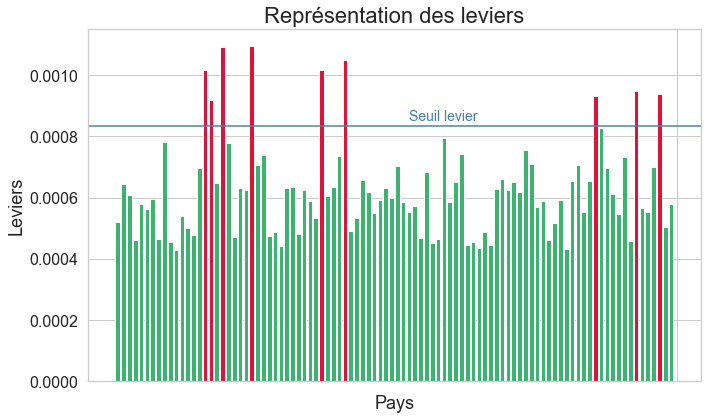

Wall time: 20 s


In [39]:
%%time

# Représentation des leviers
plt.figure(figsize=(10,6))

# Individus sous le seuil
plt.bar(Leviers_inf['Country'],Leviers_inf['Leviers'], color='mediumseagreen')

# Individus au dessus du seuil
plt.bar(Leviers_sup['Country'],Leviers_sup['Leviers'], color='crimson')

# Décoration et annotations
plt.title('Représentation des leviers', fontsize=22)
plt.xlabel('Pays', fontsize=18)
plt.xticks('', fontsize=16)
plt.ylabel('Leviers', fontsize=18)
plt.yticks(fontsize=16)
plt.axhline(y=seuil_levier, color='steelblue', linestyle='-')
plt.text(50, 0.00085 , 'Seuil levier', fontsize = '14', color='steelblue')
plt.tight_layout()
plt.show()

In [40]:
# Je place les pays leviers dans une variable en prévision d'un traitement
Pays_leviers = Leviers_sup['Country'].unique()
Pays_leviers

array(['Central African Republic', 'Chile', 'Colombia', "C�te d'Ivoire",
       'Guatemala', 'India', 'Sudan', 'Timor-Leste',
       'United States of America'], dtype=object)

## 4.2.Calcul des résidus studentisés > Outliers<a class="anchor" id="4.2"></a>

<font color='royalblue'> Résidus studentisés = résidus divisés par leur écart type empirique

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté : </font>

### Un résidu est l'écart entre la valeur observée y(i) et la valeur b x(i) + a estimée par la régression.

In [41]:
data_projet7_m4_2['rstudent'] = Regression_lineaire_3_v2.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
seuil_rstudent

1.9602112555584534

In [42]:
# statistique de test par observation
data_projet7_m4_2.sort_values(by='rstudent').head()

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent
5100,Korea Republic of,KOR,17,15227.57,32.80,0.35,9.63,2.85,41.00,0.00,-21.00
1500,Canada,CAN,122,23739.64,31.40,0.35,10.07,4.81,41.00,0.00,-15.25
1800,China,CHN,16,2522.76,48.40,0.47,7.83,2.82,41.00,0.00,-13.57
800,Bolivia,BOL,20,3016.26,50.80,0.94,8.01,3.02,41.00,0.00,-13.34
4500,Israel,ISR,142,11100.32,37.10,0.35,9.31,4.96,41.00,0.00,-11.51


In [43]:
data_projet7_m4_2.sort_values(by='rstudent').tail()

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent
1799,Chile,CHL,96583,7051.61,50.00,0.35,8.86,11.48,60.00,0.00,7.42
899,Bolivia,BOL,43786,3016.26,50.80,0.94,8.01,10.69,60.00,0.00,7.64
1999,Colombia,COL,50671,3547.01,55.25,0.88,8.17,10.83,60.00,0.00,7.80
1699,Central African Republic,CAF,14472,811.30,56.25,0.65,6.70,9.58,60.00,0.00,8.63
3699,Guatemala,GTM,39799,2142.47,55.44,0.94,7.67,10.59,60.00,0.00,8.80


In [44]:
rstudent_entre = data_projet7_m4_2.loc[(data_projet7_m4_2['rstudent'] <= seuil_rstudent) & (data_projet7_m4_2['rstudent'] >= -seuil_rstudent), :]
rstudent_sup = data_projet7_m4_2.loc[(data_projet7_m4_2['rstudent'] > seuil_rstudent), :]
rstudent_inf = data_projet7_m4_2.loc[(data_projet7_m4_2['rstudent'] < -seuil_rstudent), :]

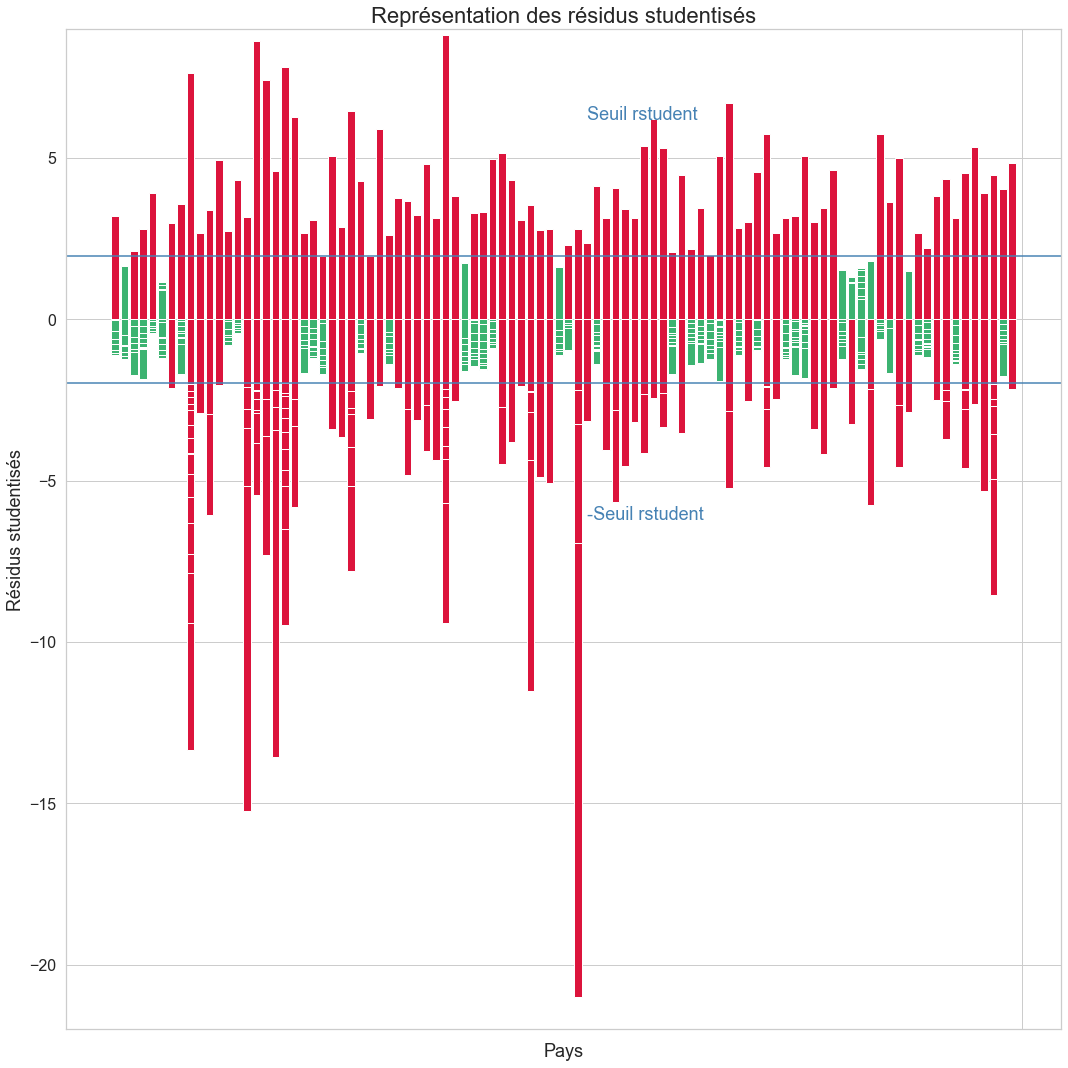

Wall time: 15.6 s


In [45]:
%%time

# Représentation des leviers
plt.figure(figsize=(15,15))

# Individus entre le seuil mini et le seuil maxi
plt.bar(rstudent_entre['Country'],rstudent_entre['rstudent'], color='mediumseagreen')

# Individus au dessus du seuil maxi
plt.bar(rstudent_sup['Country'],rstudent_sup['rstudent'], color='crimson')

# Individus en dessous du seuil maxi
plt.bar(rstudent_inf['Country'],rstudent_inf['rstudent'], color='crimson')

# Annotations
plt.title('Représentation des résidus studentisés', fontsize=22)
plt.xlabel('Pays', fontsize=18)
plt.xticks('', fontsize=16)
plt.ylim(-22,9)
plt.ylabel('Résidus studentisés', fontsize=18)
plt.yticks(fontsize=16)

plt.axhline(y=seuil_rstudent, color='steelblue', linestyle='-')
plt.text(50, 6.2 , 'Seuil rstudent', fontsize = '18', color='steelblue')

plt.axhline(y=-seuil_rstudent, color='steelblue', linestyle='-')
plt.text(50, -6.2 , '-Seuil rstudent', fontsize = '18', color='steelblue')

plt.tight_layout()
plt.show()

In [46]:
# Nombre de valeurs atypiques sur les variables à expliquer
res_stu_ln = data_projet7_m4_2.loc[(data_projet7_m4_2['rstudent'] > seuil_rstudent) | (data_projet7_m4_2['rstudent'] < -seuil_rstudent)]

len(res_stu_ln)

313

In [47]:
# Pays presentants des valeurs atypiques
data_projet7_m4_2.loc[data_projet7_m4_2.index.isin(res_stu_ln.index)].groupby(by='Country').count().sort_values(by='y_child',ascending=False)

,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent
Country,,,,,,,,,,
Bolivia,22,22,22,22,22,22,22,22,22,22
Colombia,19,19,19,19,19,19,19,19,19,19
Guatemala,14,14,14,14,14,14,14,14,14,14
Central African Republic,14,14,14,14,14,14,14,14,14,14
Ecuador,11,11,11,11,11,11,11,11,11,11
Thailand,9,9,9,9,9,9,9,9,9,9
Chile,8,8,8,8,8,8,8,8,8,8
China,8,8,8,8,8,8,8,8,8,8
United States of America,8,8,8,8,8,8,8,8,8,8


## 4.3.Determination de la distance de Cook > individus influents <a class="anchor" id="4.3"></a>

In [48]:
# Création du dataframe avec tous les resultats d'influences disponibles
influence_ln = Regression_lineaire_3_v2.get_influence().summary_frame()
influence_ln.head()

,dfb_Intercept,dfb_m_j_log,dfb_G_j,dfb_c_i_parent,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.01,0.00,0.01,0.01,0.00,-0.62,0.00,-0.01,-0.62,-0.01
1,0.00,-0.00,-0.00,-0.00,0.00,0.26,0.00,0.01,0.26,0.01
2,0.01,-0.00,-0.01,-0.01,0.00,0.63,0.00,0.01,0.63,0.01
3,0.02,-0.00,-0.01,-0.02,0.00,0.91,0.00,0.02,0.91,0.02
4,0.01,-0.00,-0.01,-0.01,0.00,0.62,0.00,0.01,0.62,0.01


In [49]:
# Ajout de la colonne distance de Cook à notre dataframe analyses_ln
data_projet7_m4_2['dcooks'] = influence_ln['cooks_d']

# Seuil d'influence selon Cook
seuil_dcook = 4/(n-p)

data_projet7_m4_2.sort_values(by='dcooks').head().style.format({"dcooks": "{:,.13f}"})

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent,dcooks
154,Armenia,ARM,1508,1628.38,29.20,0.42,7.40,7.32,51.00,0.00,-0.00,0.0000000000064
5937,Malawi,MWI,491,914.27,45.50,0.65,6.82,6.20,48.00,0.00,-0.00,0.0000000000075
5832,Madagascar,MDG,173,345.24,42.40,0.65,5.84,5.16,47.00,0.00,0.00,0.0000000000075
6211,Mauritania,MRT,590,1798.61,38.00,0.63,7.49,6.38,43.00,0.00,0.00,0.0000000000124
6547,Mongolia,MNG,1767,2338.09,35.80,0.53,7.76,7.48,50.00,0.00,0.00,0.0000000000265


In [50]:
data_projet7_m4_2.sort_values(by='dcooks').tail().style.format({"dcooks": "{:,.7f}"})

,Country,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent,dcooks
1900,Colombia,COL,62,3547.01,55.25,0.88,8.17,4.14,41.00,0.00,-9.47,0.0244466
1800,China,CHN,16,2522.76,48.40,0.47,7.83,2.82,41.00,0.00,-13.57,0.0297581
800,Bolivia,BOL,20,3016.26,50.80,0.94,8.01,3.02,41.00,0.00,-13.34,0.0347110
1500,Canada,CAN,122,23739.64,31.40,0.35,10.07,4.81,41.00,0.00,-15.25,0.0404996
5100,Korea Republic of,KOR,17,15227.57,32.80,0.35,9.63,2.85,41.00,0.00,-21.00,0.0645018


In [51]:
cooks_sup = data_projet7_m4_2.loc[(data_projet7_m4_2['dcooks'] > seuil_dcook), :]
cooks_inf = data_projet7_m4_2.loc[(data_projet7_m4_2['dcooks'] <= seuil_dcook), :]

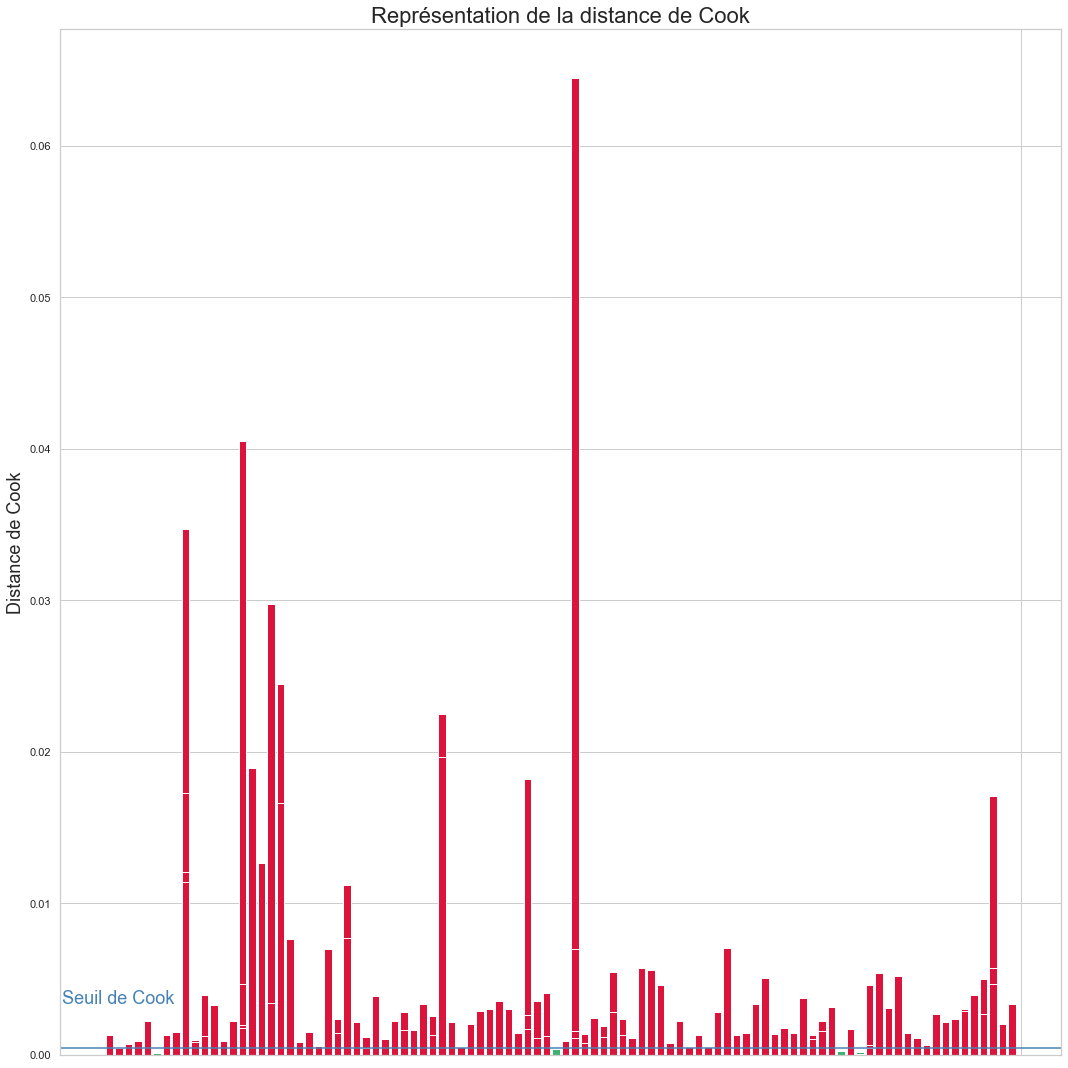

Wall time: 15.2 s


In [52]:
%%time

# Représentation de la distances de Cooks
plt.figure(figsize=(15,15))

# Individus sous le seuil
plt.bar(cooks_inf['Country'],cooks_inf['dcooks'], color='mediumseagreen')

# Individus au dessus le seuil
plt.bar(cooks_sup['Country'],cooks_sup['dcooks'], color='crimson')

# Décoration et annotations
plt.title('Représentation de la distance de Cook', fontsize=22)
plt.ylabel('Distance de Cook', fontsize=18)
plt.xticks('', fontsize=16)
plt.xticks(fontsize=16)

plt.text(-5, (seuil_dcook + 0.00300), 'Seuil de Cook', fontsize = '18', color='steelblue')
plt.axhline(y=seuil_dcook, color='steelblue', linestyle='-')

plt.tight_layout()
plt.show()

In [53]:
# Nombre d'observations influentes
dco_ln = data_projet7_m4_2.loc[data_projet7_m4_2['dcooks'] > seuil_dcook]
len(dco_ln)

424

In [54]:
# Pays présentants des obervations au dela du seuil
data_projet7_m4_2.loc[data_projet7_m4_2.index.isin(dco_ln.index)].groupby(by='Country').count().sort_values(by='y_child',ascending=False)

,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent,dcooks
Country,,,,,,,,,,,
Colombia,29,29,29,29,29,29,29,29,29,29,29
Bolivia,27,27,27,27,27,27,27,27,27,27,27
Central African Republic,21,21,21,21,21,21,21,21,21,21,21
Guatemala,20,20,20,20,20,20,20,20,20,20,20
Chile,14,14,14,14,14,14,14,14,14,14,14
Ecuador,14,14,14,14,14,14,14,14,14,14,14
United States of America,12,12,12,12,12,12,12,12,12,12,12
Swaziland,11,11,11,11,11,11,11,11,11,11,11
China,11,11,11,11,11,11,11,11,11,11,11


## 4.3.1.Observations à la fois influentes et atypiques <a class="anchor" id="4.3.1"></a>

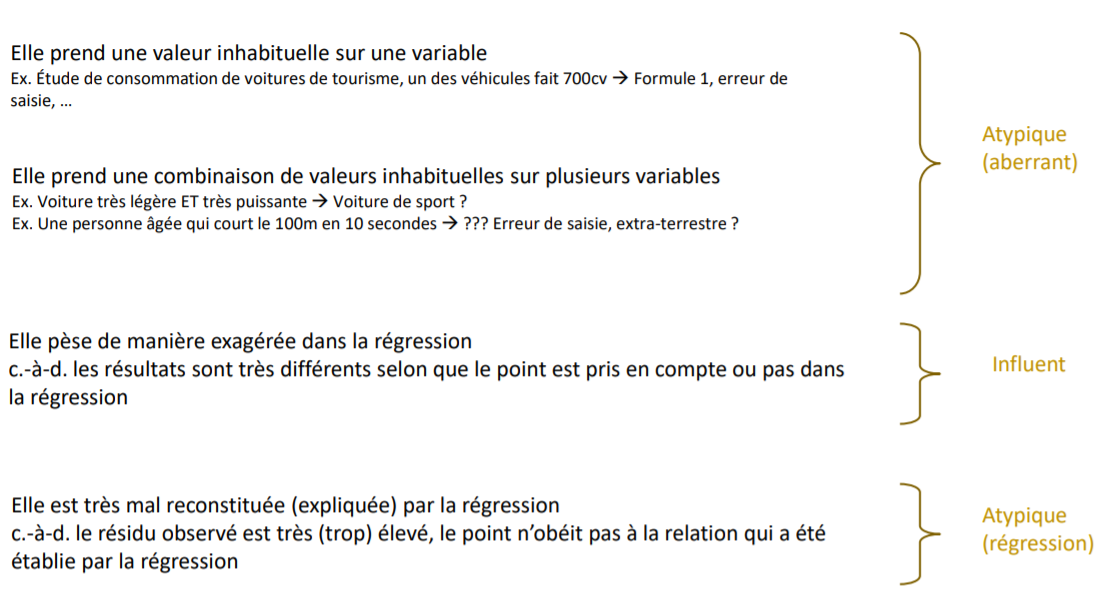

In [55]:
# Obeservations atypiques et influentes
ind_aty_infl_ln = data_projet7_m4_2.loc[((data_projet7_m4_2['dcooks'] > seuil_dcook) &
                                  (data_projet7_m4_2['rstudent'] > seuil_rstudent) &
                                  (data_projet7_m4_2['Leviers'] > seuil_levier)) |
                                  ((data_projet7_m4_2['dcooks'] > seuil_dcook) &
                                  (data_projet7_m4_2['rstudent'] < -seuil_rstudent) &
                                  (data_projet7_m4_2['Leviers'] > seuil_levier))]
len(ind_aty_infl_ln)

72

In [56]:
susp_pt = data_projet7_m4_2.loc[data_projet7_m4_2.index.isin(ind_aty_infl_ln.index)]
susp_pt.reset_index(inplace=True)
susp_pt.groupby('Country').count()

,index,ISO3,y_child,m_j,G_j,p_j,m_j_log,income_log,c_i_parent,Leviers,rstudent,dcooks
Country,,,,,,,,,,,,
Central African Republic,14,14,14,14,14,14,14,14,14,14,14,14
Chile,8,8,8,8,8,8,8,8,8,8,8,8
Colombia,19,19,19,19,19,19,19,19,19,19,19,19
C�te d'Ivoire,5,5,5,5,5,5,5,5,5,5,5,5
Guatemala,14,14,14,14,14,14,14,14,14,14,14,14
India,1,1,1,1,1,1,1,1,1,1,1,1
Sudan,2,2,2,2,2,2,2,2,2,2,2,2
Timor-Leste,1,1,1,1,1,1,1,1,1,1,1,1
United States of America,8,8,8,8,8,8,8,8,8,8,8,8


## 4.4.Vérification de la colinéarité des variables  > la constance de la variance des résidus <a class="anchor" id="4.4"></a>

In [57]:
variables = Regression_lineaire_3_v2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.2365303699012804, 1.2365318935488048, 1.0000017243545904]

### <font color='red'> Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité. </font>

## 4.5.Test de l’homoscédasticité <a class="anchor" id="4.5"></a>

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [58]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(Regression_lineaire_3_v2.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.647062488525781e-16


### <font color='red'> La p-valeur ici est inférieure à 5 %, on rejette l'hypothèse 𝐻0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité). </font>

## 4.6.Test de la normalité des résidus <a class="anchor" id="4.6"></a>

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [59]:
shapiro(Regression_lineaire_3_v2.resid)

C:\Users\33643\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7934587001800537, pvalue=0.0)

<font color='royalblue'> H0: Les données suivent une loi normale  
H1: Les données ne suivent pas une loi normale </font>

### <font color='red'> Ici, l'hypothèse de normalité est remise en cause (p-value = 0.0 < 0.05). </font>

### <font color='red'> Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille très importante, permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant parfaitement gaussien. </font>

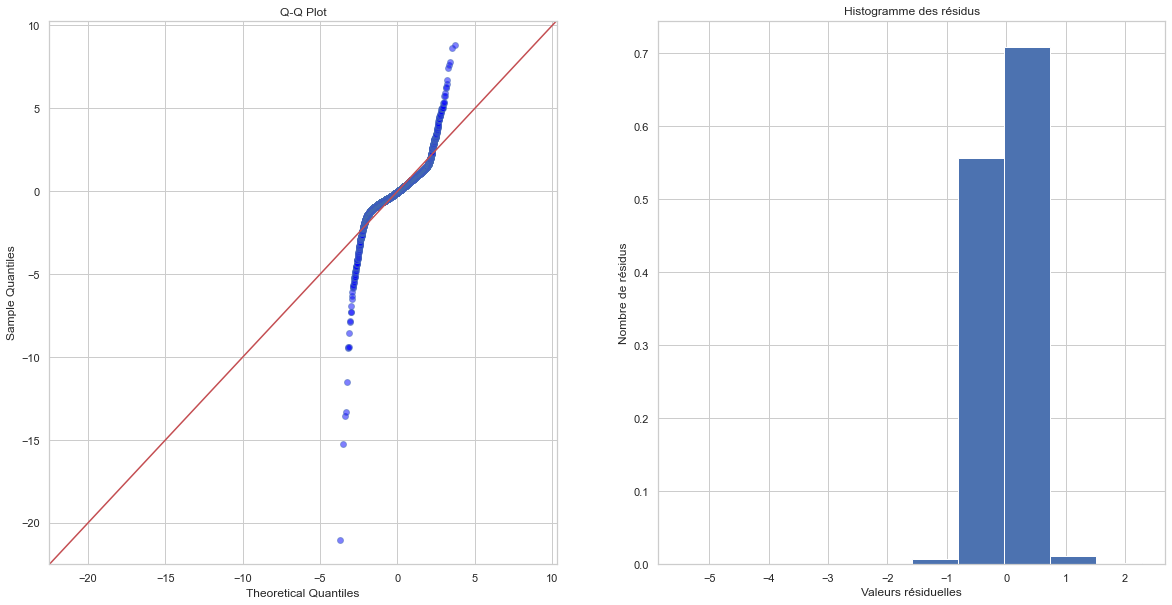

In [60]:
#Distribution des résidus
fig, ax = plt.subplots(1, 2, figsize=(20,10))

plt.hist(Regression_lineaire_3_v2.resid, density=True)

model_norm_residuals = Regression_lineaire_3_v2.get_influence().resid_studentized_internal
QQ = sm.ProbPlot(model_norm_residuals)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', ax=ax[0])

ax[0].set_title('Q-Q Plot')
ax[1].set_title('Histogramme des résidus')
ax[1].set_xlabel('Valeurs résiduelles')
ax[1].set_ylabel('Nombre de résidus')
                
plt.show()

### <font color='red'> La distribution des résidus est alignée avec la distribution théorique d'une loi normale. </font>

## 5.Prévision d'un revenu <a class="anchor" id="5"></a>

Realisons une prévision de revenu pour un enfant en fonction de ces 3 variables :  
- le revenu des parents (leur classe de revenu)  
- le revenu moyen du pays dans lequel habite le prospect  
- l'indice de Gini calculé sur les revenus des habitants du pays en question  

In [61]:
Country = data_projet7_m4_2['Country'].unique()
Country

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "C�te d'Ivoire", 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Fiji',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran Islamic Republic of', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kenya', 'Korea Republic of', 'Kyrgyzstan',
       'Lao PDR', 'Latvia', 'Liberia', 'Lithuania',
       'Macedonia Republic of', 'Madagascar', 'Malawi', 'Malaysia',
       'Mali', 'Mauritania', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'Niger',
       'Nigeria', 'Norway', 'Pakistan', 'Palest

### <font color='royalblue'> Etape 1 // Entrez le code ISO3 du pays souhaité : </font>

In [62]:
pays_selectionné = 'Albania'

###  <font color='royalblue'> Etape 2 // Entrez la classe de revenu du parent : </font>

In [63]:
c_i_parent_target = 1

In [64]:
print('Le pays selectionné est :', pays_selectionné)

revenu_moyen_pays = data_projet7_m4.loc[(data_projet7_m4['Country'] == pays_selectionné), 'm_j'].iloc[0]
print('Le revenu moyen du pays selectionné est de', revenu_moyen_pays,"$")

revenu_moyen_pays_log = np.log(revenu_moyen_pays)
print('Le revenu moyen en log du pays selectionné est de', revenu_moyen_pays_log)

indice_gini_pays = data_projet7_m4.loc[(data_projet7_m4['Country'] == pays_selectionné), 'G_j'].iloc[0]
print("L'indice de gini du pays selectionné est de", indice_gini_pays)

a_prevoir = pd.DataFrame({'m_j_log':[revenu_moyen_pays_log], 'G_j':[indice_gini_pays],'c_i_parent':[c_i_parent_target]})
Revenu_enfant = Regression_lineaire_2_v2.predict(a_prevoir)

# Ajouter * devant une variable lors d'un print permet de ne pas afficher le Dtypes ni l'index
Revenu_enfant_calculé = np.exp(*Revenu_enfant)
Revenu_enfant_calculé

print("Le revenu d'un individu en",pays_selectionné,"dont les parents ont une classe de revenu égale à",c_i_parent_target," est de",Revenu_enfant_calculé,"$",)

Le pays selectionné est : Albania
Le revenu moyen du pays selectionné est de 2994.829902000176 $
Le revenu moyen en log du pays selectionné est de 8.004642714946785
L'indice de gini du pays selectionné est de 29.98
Le revenu d'un individu en Albania dont les parents ont une classe de revenu égale à 1  est de 2573.1550133855335 $
